In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/rabbits_results - Sheet1.csv')

In [ ]:
# rename model row phi-1_5 to phi1.5
data['Model'] = data['Model'].replace('phi-1_5', 'phi1.5')
data['Model'] = data['Model'].replace('Phi-3-medium-4k','phi-3-medium-4k')

In [ ]:
pal = sns.color_palette("viridis", len(data['Model'])) #viridis

<ipython-input-27-484aeb6739cf>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=b4bqa_scores, palette=pal)
<ipython-input-27-484aeb6739cf>:15: UserWarning: The palette list has more values (23) than needed (20), which may not be intended.
  sns.barplot(x=models, y=b4bqa_scores, palette=pal)


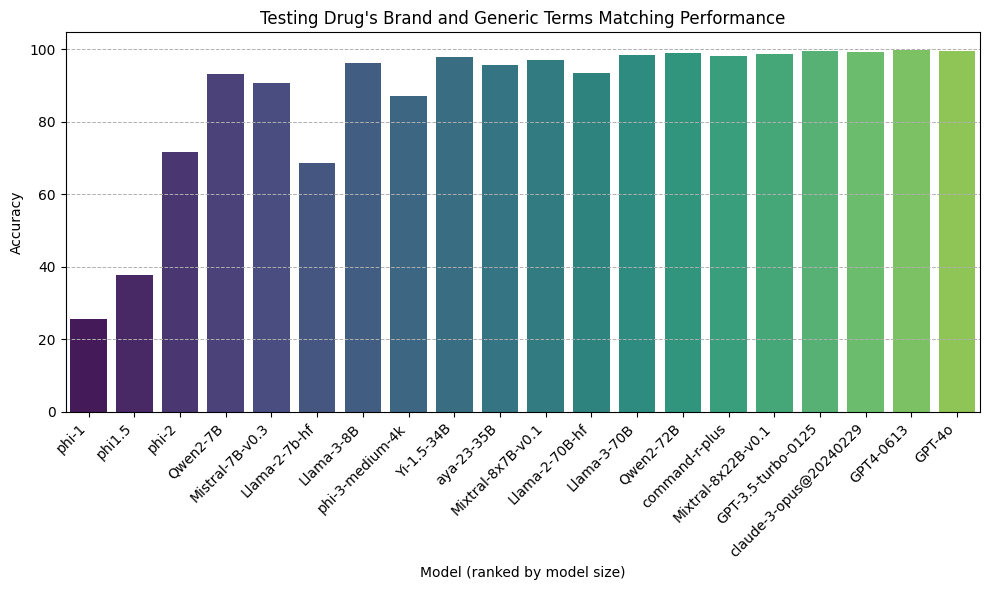

In [ ]:


def plot_b4bqa_bar_graph(data):
    # Drop rows with missing values in b4bqa
    data_clean = data.dropna(subset=['b4bqa'])

    # Sort data by model size
    sorted_data = data_clean.sort_values(by='size')

    # Extract the relevant columns
    models = sorted_data['Model']
    sizes = sorted_data['size']
    b4bqa_scores = sorted_data['b4bqa']

    # Create the bar plot using seaborn for better coloring
    plt.figure(figsize=(10, 6))
    sns.barplot(x=models, y=b4bqa_scores, palette=pal)

    # Adding grid
    plt.grid(axis='y', linestyle='--', linewidth=0.7)

    # Labeling the axes
    plt.xlabel('Model (ranked by model size)')
    plt.ylabel('Accuracy')

    # Adding title
    plt.title('Testing Drug\'s Brand and Generic Terms Matching Performance')

    # Show the plot
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # plt.show()

# Usage of the function
plot_b4bqa_bar_graph(data)

# export figure in high resolution
plt.savefig('b4bqa.png', dpi=300)

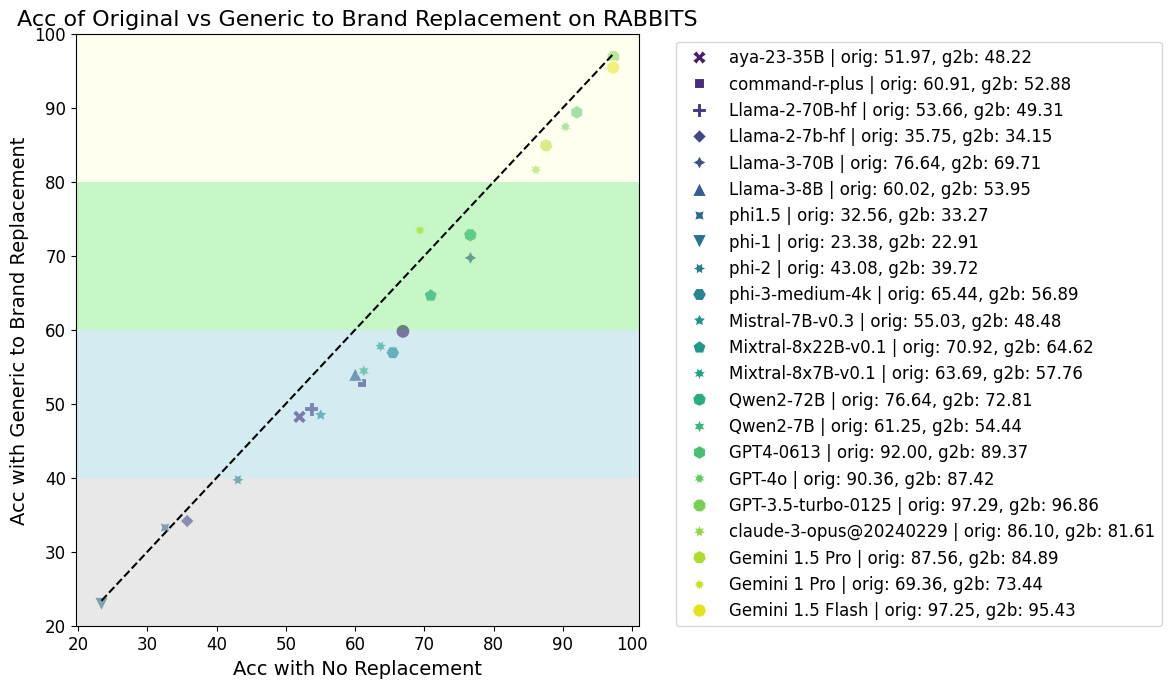

In [ ]:
def plot_avg_orig_vs_avg_g2b_with_larger_fonts(data):
    # Drop rows with missing values in avg_orig or avg_g2b
    data_clean = data.dropna(subset=['avg_orig', 'avg_g2b'])

    # Create the scatter plot
    plt.figure(figsize=(12, 7))
    scatter = sns.scatterplot(
        x='avg_orig',
        y='avg_g2b',
        hue='Model',
        style='Model',
        s=100,
        palette= pal, #pal,
        data=data_clean
    )

    # Adding grid and diagonal line
    # plt.grid(True)
    plt.plot([data_clean['avg_orig'].min(), data_clean['avg_orig'].max()],
             [data_clean['avg_orig'].min(), data_clean['avg_orig'].max()],
             'k--')

    # Labeling the axes with larger font size
    plt.xlabel('Acc with No Replacement', fontsize=14)
    plt.ylabel('Acc with Generic to Brand Replacement', fontsize=14)

    # Adding title with larger font size
    plt.title('Acc of Original vs Generic to Brand Replacement on RABBITS', fontsize=16)

    # Create custom legend with larger font size
    handles, labels = scatter.get_legend_handles_labels()
    new_labels = []
    for i, label in enumerate(labels[1:]):
        model_name = label.split(' | ')[0]
        avg_orig_value = data_clean[data_clean['Model'] == model_name]['avg_orig'].values[0]
        avg_g2b_value = data_clean[data_clean['Model'] == model_name]['avg_g2b'].values[0]
        new_labels.append(f"{model_name} | orig: {avg_orig_value:.2f}, g2b: {avg_g2b_value:.2f}")

    # Removing the original legend
    scatter.legend_.remove()

    # Adding the new custom legend
    plt.legend(handles=handles[1:], labels=new_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13')

    # Adding background shading
    plt.axhspan(20, 40, facecolor='lightgrey', alpha=0.5)
    plt.axhspan(40, 60, facecolor='lightblue', alpha=0.5)
    plt.axhspan(60, 80, facecolor='lightgreen', alpha=0.5)
    plt.axhspan(80, 100, facecolor='lightyellow', alpha=0.5)

    # Show the plot with larger tick labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(20, 100)
    plt.tight_layout()
    # plt.show()

# Usage of the function
plot_avg_orig_vs_avg_g2b_with_larger_fonts(data)
# export figure in high resolution
plt.savefig('b4b_tight.png', dpi=300)

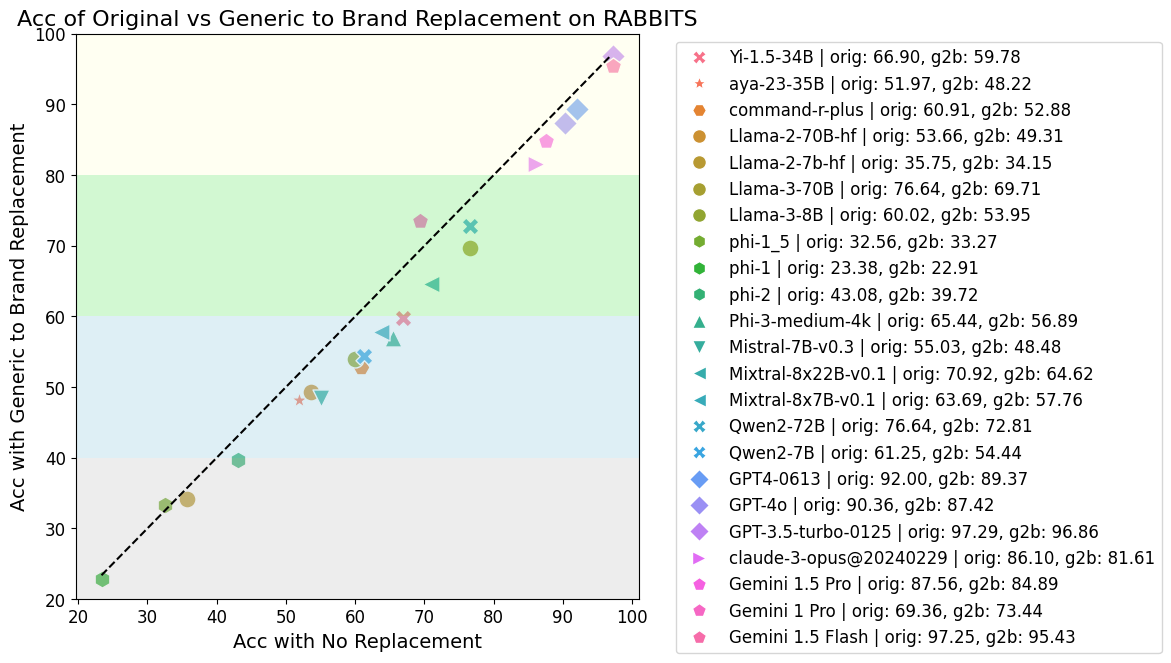

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_avg_orig_vs_avg_g2b_with_larger_fonts(data):
    # Drop rows with missing values in avg_orig or avg_g2b
    data_clean = data.dropna(subset=['avg_orig', 'avg_g2b'])

    # Define a diverse color palette and ensure it has enough colors
    unique_models = data_clean['Model'].unique()
    palette = sns.color_palette('husl', 23)

    # Define marker styles for different groups
    model_shapes = {
        'Llama': 'o',
        'Qwen': 'X',
        'GPT': 'D',
        'Phi': '^',
        'Mistral': 'v',
        'Mixtral': '<',
        'claude': '>',
        'Gemini': 'p',
        'aya': '*',
        'command': 'H',
        'Yi': 'X',
        'default': 'h'
    }

    # Function to assign markers based on model name
    def get_marker(model_name):
        for key in model_shapes:
            if key in model_name:
                return model_shapes[key]
        return model_shapes['default']

    # Create a column for markers in the dataframe
    data_clean['Marker'] = data_clean['Model'].apply(get_marker)

    # Map colors to models
    model_to_color = {model: palette[i] for i, model in enumerate(unique_models)}

    # Create the scatter plot
    plt.figure(figsize=(12, 7))
    for model in unique_models:
        subset = data_clean[data_clean['Model'] == model]
        sns.scatterplot(
            x='avg_orig',
            y='avg_g2b',
            hue='Model',
            style='Model',
            s=150,  # Increase marker size
            palette=[model_to_color[model]],
            markers=[subset['Marker'].values[0]],
            data=subset,
            legend=False
        )

    # Adding grid and diagonal line
    plt.plot([data_clean['avg_orig'].min(), data_clean['avg_g2b'].max()],
             [data_clean['avg_orig'].min(), data_clean['avg_g2b'].max()],
             'k--')

    # Labeling the axes with larger font size
    plt.xlabel('Acc with No Replacement', fontsize=14)
    plt.ylabel('Acc with Generic to Brand Replacement', fontsize=14)

    # Adding title with larger font size
    plt.title('Acc of Original vs Generic to Brand Replacement on RABBITS', fontsize=16)

    # Custom legend creation
    handles = []
    labels = []
    for model in unique_models:
        row = data_clean[data_clean['Model'] == model].iloc[0]
        handles.append(plt.Line2D([0], [0], marker=row['Marker'], color='w', label=row['Model'],
                                  markerfacecolor=model_to_color[model], markersize=10))
        labels.append(f"{row['Model']} | orig: {row['avg_orig']:.2f}, g2b: {row['avg_g2b']:.2f}")

    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13')

    # Adjusting the background shading to be less obtrusive
    plt.axhspan(20, 40, facecolor='lightgrey', alpha=0.4)
    plt.axhspan(40, 60, facecolor='lightblue', alpha=0.4)
    plt.axhspan(60, 80, facecolor='lightgreen', alpha=0.4)
    plt.axhspan(80, 100, facecolor='lightyellow', alpha=0.4)

    # Show the plot with larger tick labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(20, 100)
    plt.tight_layout()
    plt.savefig('b4b_tight.png', dpi=300)

# Usage of the function
plot_avg_orig_vs_avg_g2b_with_larger_fonts(data)


<ipython-input-30-690c4bc54fc8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-30-690c4bc54fc8>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


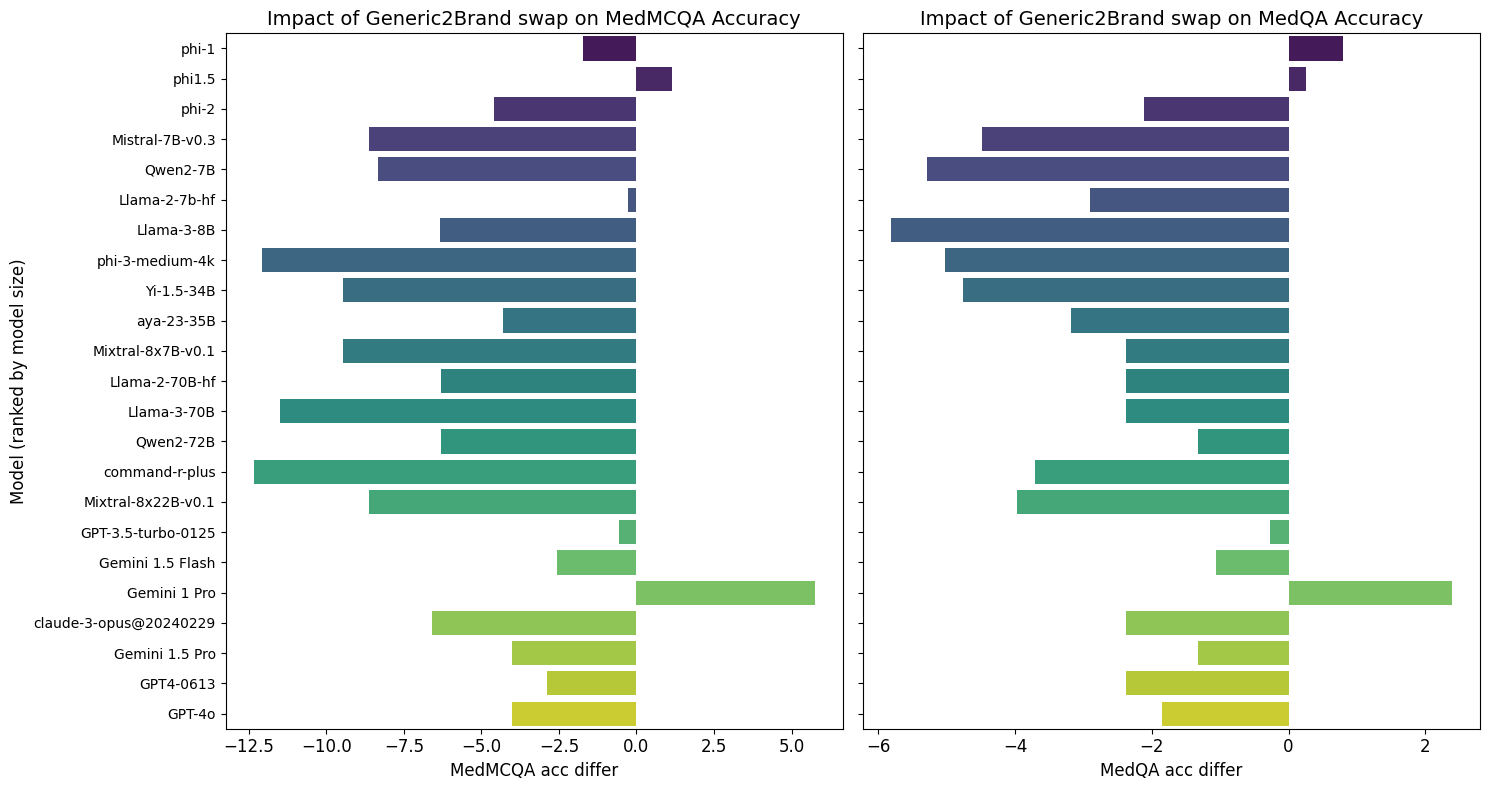

In [ ]:
def plot_side_by_side_medqa_medmcqa_diff(data):
    # Drop rows with missing values in medmcqa_diff or medqa_diff
    data_clean = data.dropna(subset=['medmcqa_diff', 'medqa_diff'])

    # Sort data by model size
    sorted_data = data_clean.sort_values(by='size')

    # Create figure and subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharey=True)

    # Plot for medmcqa_diff
    sns.barplot(
        x='medmcqa_diff',
        y='Model',
        data=sorted_data,
        ax=axes[0],
        palette=pal
    )
    axes[0].set_title('Impact of Generic2Brand swap on MedMCQA Accuracy', fontsize=14)
    axes[0].set_xlabel('MedMCQA acc differ', fontsize=12)
    axes[0].set_ylabel('Model (ranked by model size)', fontsize=12)
    axes[0].tick_params(axis='y', labelsize=10)
    axes[0].tick_params(axis='x', labelsize=12)

    # Plot for medqa_diff
    sns.barplot(
        x='medqa_diff',
        y='Model',
        data=sorted_data,
        ax=axes[1],
        palette= pal#'RdYlGn_r'
    )
    axes[1].set_title('Impact of Generic2Brand swap on MedQA Accuracy', fontsize=14)
    axes[1].set_xlabel('MedQA acc differ', fontsize=12)
    axes[1].set_ylabel('')
    axes[1].tick_params(axis='x', labelsize=12)

    # Adjust layout
    plt.tight_layout()
    # plt.show()

# Usage of the function
plot_side_by_side_medqa_medmcqa_diff(data)


# export figure in high resolution
plt.savefig('accuracy_difference_generic_to_brand.png', dpi=300)

<ipython-input-31-c82af93cb83c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-31-c82af93cb83c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


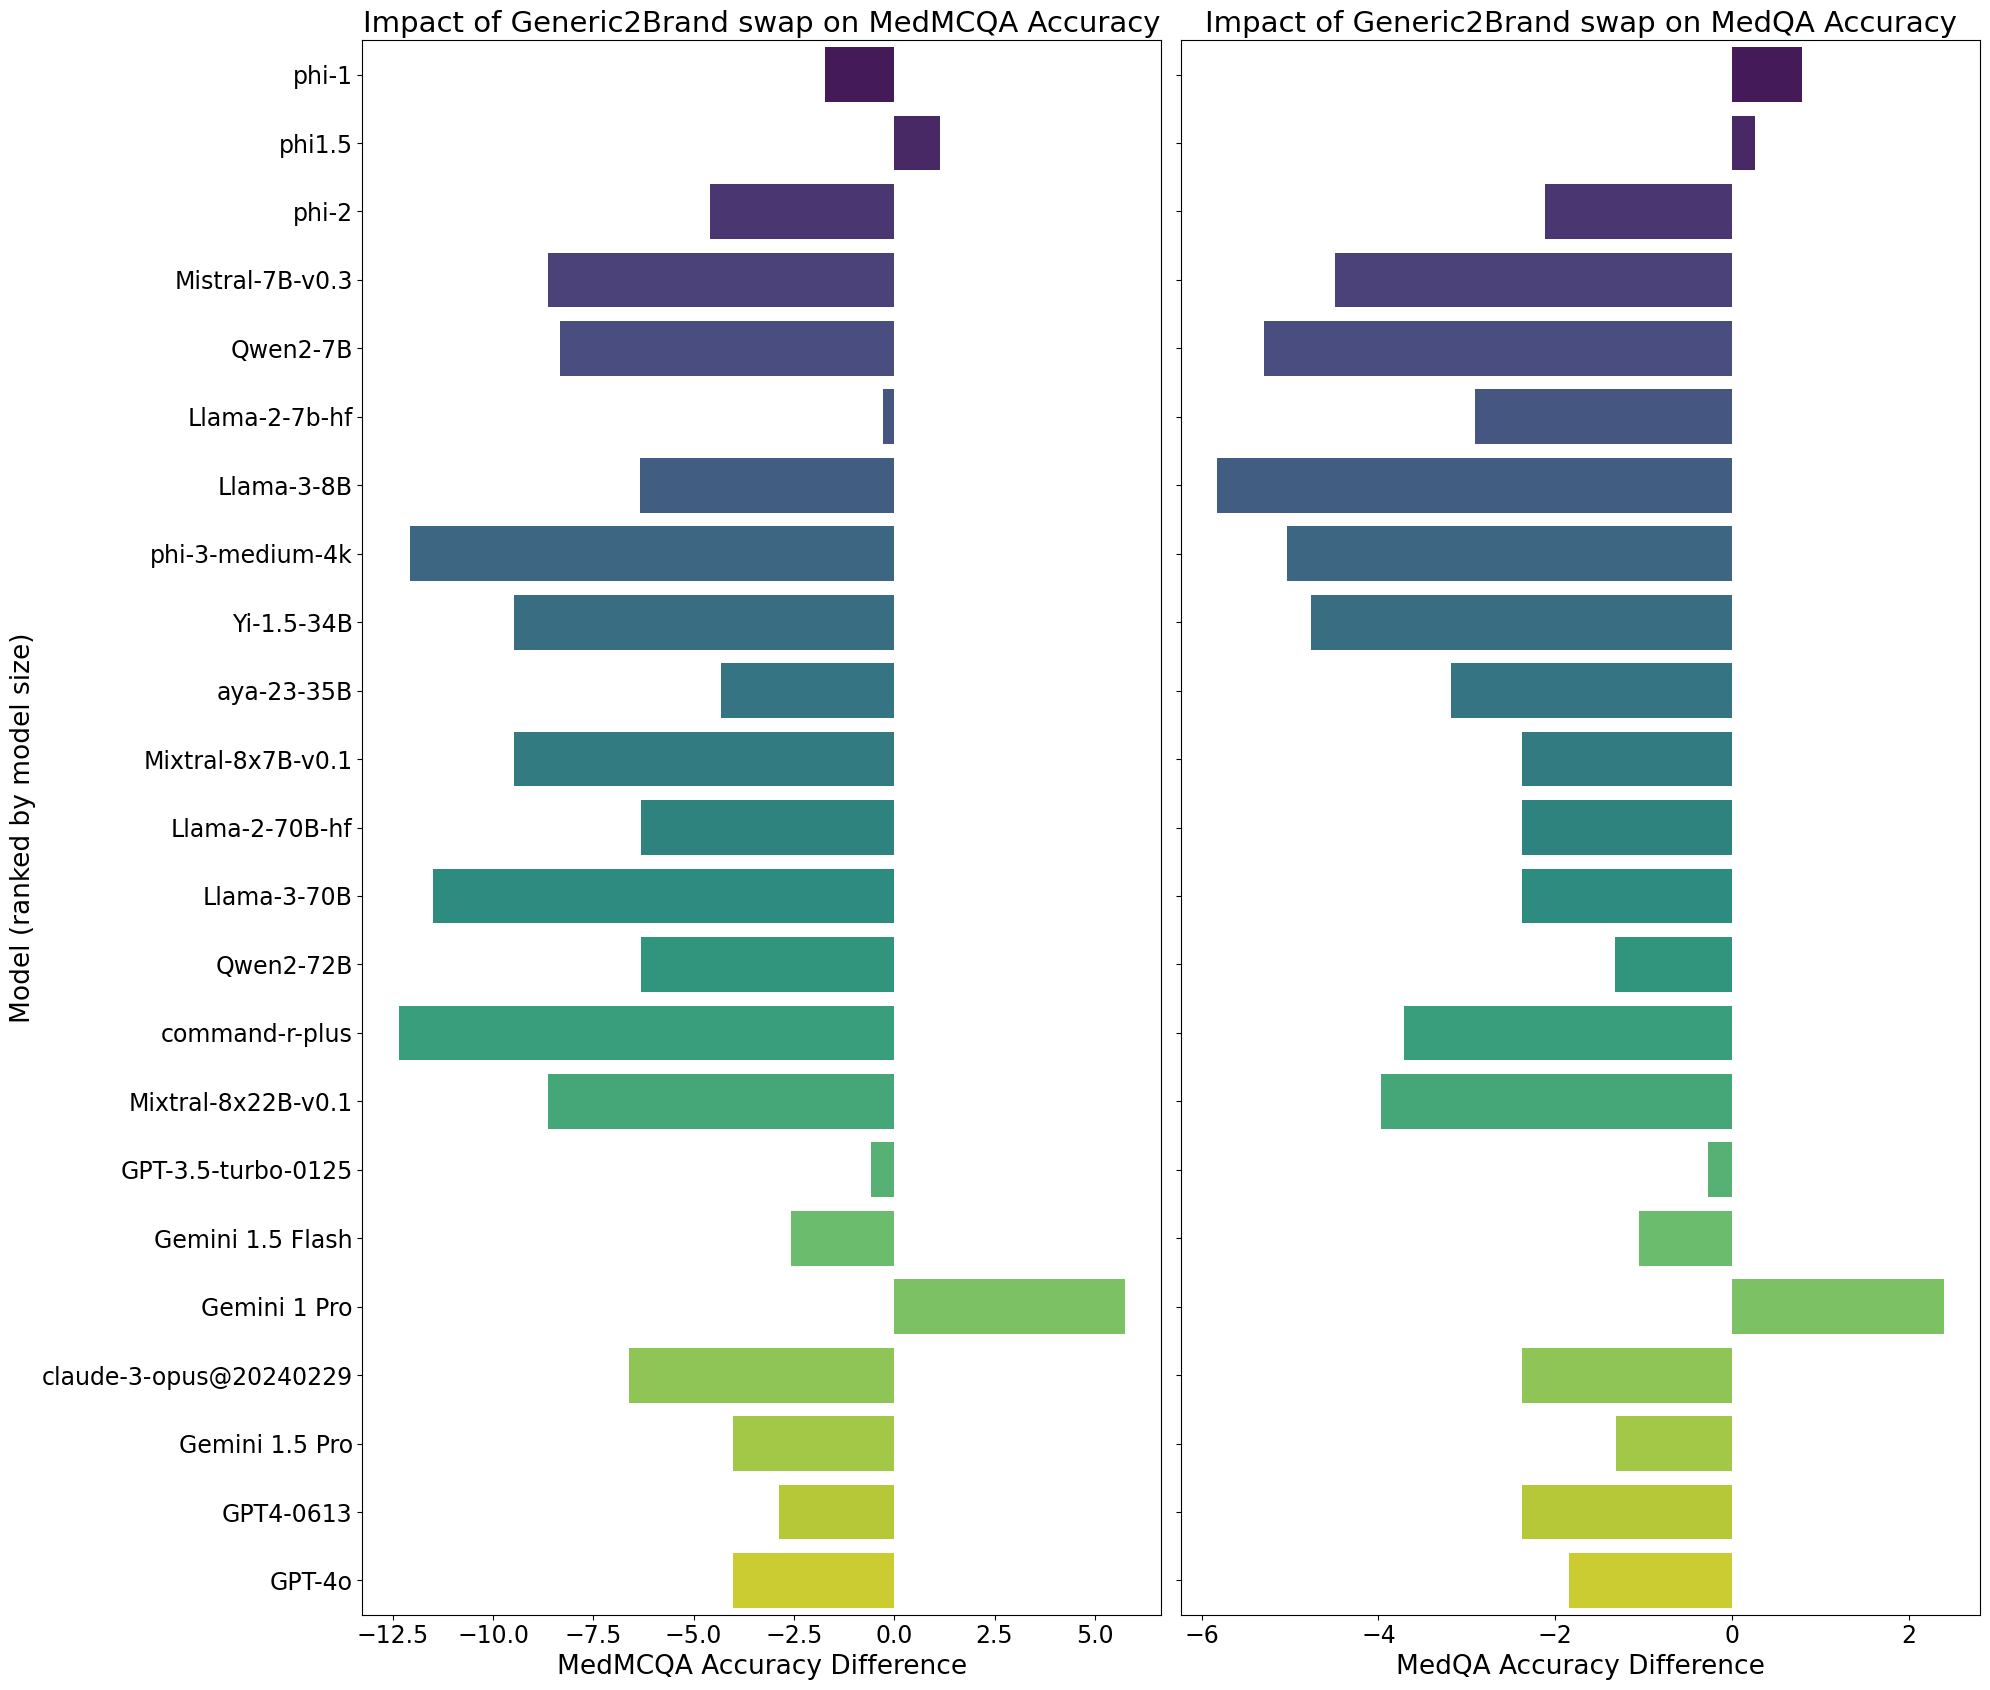

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_side_by_side_medqa_medmcqa_diff(data):
    # Drop rows with missing values in medmcqa_diff or medqa_diff
    data_clean = data.dropna(subset=['medmcqa_diff', 'medqa_diff'])

    # Sort data by model size
    sorted_data = data_clean.sort_values(by='size')

    # Create figure and subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 17), sharey=True)

    # Plot for medmcqa_diff
    sns.barplot(
        x='medmcqa_diff',
        y='Model',
        data=sorted_data,
        ax=axes[0],
        palette=pal
    )
    axes[0].set_title('Impact of Generic2Brand swap on MedMCQA Accuracy', fontsize=21)
    axes[0].set_xlabel('MedMCQA Accuracy Difference', fontsize=19)
    axes[0].set_ylabel('Model (ranked by model size)', fontsize=19)
    axes[0].tick_params(axis='y', labelsize=17)
    axes[0].tick_params(axis='x', labelsize=17)

    # Plot for medqa_diff
    sns.barplot(
        x='medqa_diff',
        y='Model',
        data=sorted_data,
        ax=axes[1],
        palette=pal
    )
    axes[1].set_title('Impact of Generic2Brand swap on MedQA Accuracy', fontsize=21)
    axes[1].set_xlabel('MedQA Accuracy Difference', fontsize=19)
    axes[1].set_ylabel('')
    axes[1].tick_params(axis='x', labelsize=17)
    axes[1].tick_params(axis='y', labelsize=17)

    # Adjust layout
    plt.tight_layout()

    # Save figure in high resolution
    plt.savefig('accuracy_difference_generic_to_brand.png', dpi=300)

# Usage of the function
plot_side_by_side_medqa_medmcqa_diff(data)


In [ ]:
# Extract the relevant data from the CSV to create the required table
# Group by Dataset and Model, and get the g2b and original scores

# Data is already loaded in `data`

# Creating the new table dataframe
new_table_data = []

# Mapping original column names to match the required format
column_mapping = {
    "medmcqa_g2b": "g2b",
    "medmcqa_orig_filtered": "original"
}

for _, row in data.iterrows():
    new_table_data.append({
        "Dataset": "medmcqa",
        "Model": row['Model'],
        "g2b": row["medmcqa_g2b"],
        "original": row["medmcqa_orig_filtered"]
    })
    new_table_data.append({
        "Dataset": "medqa 4options",
        "Model": row['Model'],
        "g2b": row["medqa_4options_g2b"],
        "original": row["medqa_4options_orig_filtered"]
    })

new_table_df = pd.DataFrame(new_table_data)

# Sorting the dataframe for better readability
new_table_df = new_table_df.sort_values(by=["Dataset", "Model"])

import pandas as pd

# Print the dataframe in LaTeX tabular format
latex_table = new_table_df.to_latex(index=False, float_format="%.2f")

latex_table


'\\begin{tabular}{llrr}\n\\toprule\nDataset & Model & g2b & original \\\\\n\\midrule\nmedmcqa & GPT-3.5-turbo-0125 & 97.70 & 98.28 \\\\\nmedmcqa & GPT-4o & 86.49 & 90.52 \\\\\nmedmcqa & GPT4-0613 & 88.79 & 91.67 \\\\\nmedmcqa & Gemini 1 Pro & 73.85 & 68.10 \\\\\nmedmcqa & Gemini 1.5 Flash & 94.83 & 97.41 \\\\\nmedmcqa & Gemini 1.5 Pro & 82.47 & 86.49 \\\\\nmedmcqa & Llama-2-70B-hf & 45.98 & 52.30 \\\\\nmedmcqa & Llama-2-7b-hf & 33.91 & 34.20 \\\\\nmedmcqa & Llama-3-70B & 66.67 & 78.16 \\\\\nmedmcqa & Llama-3-8B & 52.87 & 59.20 \\\\\nmedmcqa & Mistral-7B-v0.3 & 48.28 & 56.90 \\\\\nmedmcqa & Mixtral-8x22B-v0.1 & 61.78 & 70.40 \\\\\nmedmcqa & Mixtral-8x7B-v0.1 & 55.46 & 64.94 \\\\\nmedmcqa & Phi-3-medium-4k & 60.34 & 72.41 \\\\\nmedmcqa & Qwen2-72B & 71.55 & 77.87 \\\\\nmedmcqa & Qwen2-7B & 55.17 & 63.51 \\\\\nmedmcqa & Yi-1.5-34B & 59.77 & 69.25 \\\\\nmedmcqa & aya-23-35B & 48.56 & 52.87 \\\\\nmedmcqa & claude-3-opus@20240229 & 79.89 & 86.49 \\\\\nmedmcqa & command-r-plus & 49.14 & 61.49

In [ ]:
print(latex_table)

\begin{tabular}{llrr}
\toprule
Dataset & Model & g2b & original \\
\midrule
medmcqa & GPT-3.5-turbo-0125 & 97.70 & 98.28 \\
medmcqa & GPT-4o & 86.49 & 90.52 \\
medmcqa & GPT4-0613 & 88.79 & 91.67 \\
medmcqa & Gemini 1 Pro & 73.85 & 68.10 \\
medmcqa & Gemini 1.5 Flash & 94.83 & 97.41 \\
medmcqa & Gemini 1.5 Pro & 82.47 & 86.49 \\
medmcqa & Llama-2-70B-hf & 45.98 & 52.30 \\
medmcqa & Llama-2-7b-hf & 33.91 & 34.20 \\
medmcqa & Llama-3-70B & 66.67 & 78.16 \\
medmcqa & Llama-3-8B & 52.87 & 59.20 \\
medmcqa & Mistral-7B-v0.3 & 48.28 & 56.90 \\
medmcqa & Mixtral-8x22B-v0.1 & 61.78 & 70.40 \\
medmcqa & Mixtral-8x7B-v0.1 & 55.46 & 64.94 \\
medmcqa & Phi-3-medium-4k & 60.34 & 72.41 \\
medmcqa & Qwen2-72B & 71.55 & 77.87 \\
medmcqa & Qwen2-7B & 55.17 & 63.51 \\
medmcqa & Yi-1.5-34B & 59.77 & 69.25 \\
medmcqa & aya-23-35B & 48.56 & 52.87 \\
medmcqa & claude-3-opus@20240229 & 79.89 & 86.49 \\
medmcqa & command-r-plus & 49.14 & 61.49 \\
medmcqa & phi-1 & 24.14 & 25.86 \\
medmcqa & phi-2 & 37.64 & 42

In [ ]:
# Creating the new summary table dataframe
summary_table_data = []

for _, row in data.iterrows():
    if pd.notna(row["avg_orig"]) and pd.notna(row["avg_g2b"]) and pd.notna(row["avg_diff"]):
        summary_table_data.append({
            "Model": row['Model'],
            "Original": row["avg_orig"],
            "g2b": row["avg_g2b"],
            "Average": (row["avg_orig"] + row["avg_g2b"]) / 2,
            "Difference": row["avg_diff"]
        })

summary_table_df = pd.DataFrame(summary_table_data)

# Sorting the dataframe for better readability
summary_table_df = summary_table_df.sort_values(by=["Model"])

# Print the dataframe in LaTeX tabular format
summary_latex_table = summary_table_df.to_latex(index=False, float_format="%.2f")

print(summary_latex_table)


\begin{tabular}{lrrrr}
\toprule
Model & Original & g2b & Average & Difference \\
\midrule
GPT-3.5-turbo-0125 & 97.29 & 96.86 & 97.08 & -0.42 \\
GPT-4o & 90.36 & 87.42 & 88.89 & -2.94 \\
GPT4-0613 & 92.00 & 89.37 & 90.69 & -2.63 \\
Gemini 1 Pro & 69.36 & 73.44 & 71.40 & 4.07 \\
Gemini 1.5 Flash & 97.25 & 95.43 & 96.34 & -1.82 \\
Gemini 1.5 Pro & 87.56 & 84.89 & 86.22 & -2.67 \\
Llama-2-70B-hf & 53.66 & 49.31 & 51.49 & -4.35 \\
Llama-2-7b-hf & 35.75 & 34.15 & 34.95 & -1.60 \\
Llama-3-70B & 76.64 & 69.71 & 73.18 & -6.93 \\
Llama-3-8B & 60.02 & 53.95 & 56.99 & -5.82 \\
Mistral-7B-v0.3 & 55.03 & 48.48 & 51.76 & -6.55 \\
Mixtral-8x22B-v0.1 & 70.92 & 64.62 & 67.77 & -6.29 \\
Mixtral-8x7B-v0.1 & 63.69 & 57.76 & 60.72 & -5.93 \\
Phi-3-medium-4k & 65.44 & 56.89 & 61.16 & -8.55 \\
Qwen2-72B & 76.64 & 72.81 & 74.72 & -3.83 \\
Qwen2-7B & 61.25 & 54.44 & 57.84 & -6.82 \\
Yi-1.5-34B & 66.90 & 59.78 & 63.34 & -7.12 \\
aya-23-35B & 51.97 & 48.22 & 50.09 & -3.75 \\
claude-3-opus@20240229 & 86.10 & 81.61